In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercise 2: Implement Logistic Regression

In [223]:
class LogisticRegression:
    def __init__(self, x, y):
        self.intercept = np.ones((x.shape[0], 1))
        self.x = np.concatenate((self.intercept, x), axis=1) #add column 1 to X
        self.w = np.zeros(self.x.shape[1])
        self.y = y
        
    #sigmoid func
    def sigmoid(self, x, w):
        z = x@w
        return 1 / (1 + np.exp(-z))
    
    #Loss
    def loss(self, y_hat, y):
        return np.sum(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
    
    #gradient descent
    def gradient_descent(self, X, y_hat, y):
        return (X.T@(y_hat - y)) / y.shape[0]
    
    def fit_logistic_regression(self, learning_rate, iterations):
        for i in range(1, iterations):
            sigma = self.sigmoid(self.x, self.w)
            loss = self.loss(sigma, self.y)
            dW = self.gradient_descent(self.x, sigma, self.y)
            #update w
            self.w = self.w - learning_rate * dW
        return f"Error: {loss}, Parameters: {self.w}"
    
    def predict(self, x_new , tresh):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.w)
        result = result >= tresh
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
                 
        return y_pred
    
    def boundary(self, x_):
        bound = -(self.w[0] + self.w[1]*x_)/self.w[2]
        return bound
    
            
        

### Exercise 3: Vẽ boundary cho 2 class

In [224]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')
data.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [225]:
data = data.values

In [226]:
x = data[:,0:2]
y = data[:,2]
L = LogisticRegression(x,y)
L.fit_logistic_regression(0.1, 1000)

'Error: 4.681064880388028, Parameters: [-4.57355133  0.3292139   2.81813478]'

In [227]:
y_pred = L.predict(x, 0.5)
accuracy = sum(y_pred == y) / y.shape[0]
print(f'accuracy: {accuracy}')

accuracy: 0.95


In [228]:
#x trong hai TH y = 1 va y = 0
x_cho_vay = x[y==1]
x_tu_choi = x[y==0]

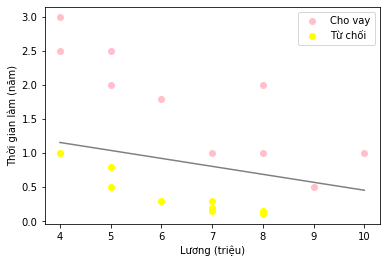

In [229]:
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='pink', label='Cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='yellow', label='Từ chối')
            #x[:,0]: Lương    #x[:,1]: Tgian làm
plt.legend(loc='upper right')
plt.xlabel('Lương (triệu)')
plt.ylabel('Thời gian làm (năm)')
plt.plot((4, 10), (L.boundary(4), L.boundary(10)), c='gray')
plt.show()